In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

fm = tf.keras.datasets.fashion_mnist
(Xtr, ytr), (xtst, ytst) = fm.load_data()

In [16]:
Xtr.shape, ytr.shape, xtst.shape, ytst.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [17]:
np.unique(ytr)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [18]:
cn = ['T-shirt' , 'Trouser', 'Pullover', 'Dress',
'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [19]:
cn[ytr[19]]

'Coat'

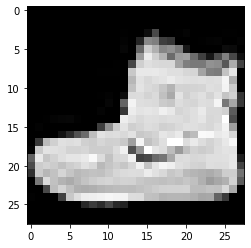

'Ankle boot'

In [20]:
plt.figure()
plt.imshow(Xtr[0],cmap=plt.cm.gray)
plt.show()
cn[ytr[0]]

In [21]:
Xtr = Xtr/255.0
xtst = xtst/255.0

In [22]:
nnModel = tf.keras.Sequential([ #no convolutions, just dense layers
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [23]:
nnModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
                , loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
                , metrics=['accuracy'])

In [24]:
nnModel.fit(Xtr,ytr,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5839 - accuracy: 0.7917
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4300 - accuracy: 0.8445
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3945 - accuracy: 0.8557
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3734 - accuracy: 0.8620
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3573 - accuracy: 0.8689
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3412 - accuracy: 0.8751
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3306 - accuracy: 0.8772
Epoch 8/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3252 - accuracy: 0.8808
Epoch 9/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3177 - accuracy: 0.8830
Epoch 10/10
1875/1875 [==============================] - 16s 8ms/step - 

In [25]:
pm = tf.keras.Sequential([nnModel,tf.keras.layers.Softmax()])

In [26]:
y_pred = pm.predict(xtst)
y_pred[0]

313/313 [==============================] - 1s 3ms/step


array([1.9557346e-07, 4.7422060e-07, 1.3496139e-08, 1.8220433e-07,
       3.0045356e-08, 5.7526585e-03, 1.8286008e-07, 9.5255617e-03,
       3.0172039e-08, 9.8472071e-01], dtype=float32)

In [31]:
def Check(y_pred,ytst,i):
    classLabel = np.argmax(y_pred[i])
    return cn[classLabel], cn[ytst[i]]
Check(y_pred,ytst,100)

('Dress', 'Dress')